<a href="https://colab.research.google.com/github/KIrie-0217/Python_practice/blob/master/%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86%E3%81%AE%E5%9F%BA%E7%A4%8E_%E3%82%AC%E3%83%B3%E3%83%9E%E5%A4%89%E6%8F%9B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# ガンマ変換

## 式定義

In [15]:
def linear_plt():

  # xの値を格納したNumPyリスト
  x = np.linspace(0,255,256)
  # yの値を計算
  k1, k2 = 2.0, 0.5
  y = x
  y1 = x*k1
  y2 = x*k2


  # フォントの種類
  plt.rcParams["font.family"] = "Times New Roman"

  # アス比を1:1に固定
  plt.axes().set_aspect('equal')

  # 線を引く
  plt.plot(x, y, "k-", label="$\k =1$",linewidth=2)
  plt.plot(x, y1, "r--", label="$\k =2.0$", linewidth=2)
  plt.plot(x, y2, "b--", label="$\k =0.5$", linewidth=2)

  # 軸の設定
  plt.xlim(0, 255)
  plt.ylim(0, 255)
  plt.xticks([0, 127, 255], fontsize = 10)
  plt.yticks([0, 127, 255], fontsize = 10)
  plt.xlabel('$I(x,y)$', fontsize=20)
  plt.ylabel('$I\'(x,y)$', fontsize=20)

  # グリッドの描画
  plt.grid()

  # 凡例表示
  plt.legend(loc=2, fontsize=10)

  # グラフ表示
  plt.show()


In [11]:
def ganma_plt():

  # xの値を格納したNumPyリスト
  x = np.linspace(0,255,256)
  # yの値を計算
  gamma1, gamma2 = 2.0, 0.5
  y = x
  y1 = 255*(x/255)**(1/gamma1)
  y2 = 255*(x/255)**(1/gamma2)


  # フォントの種類
  plt.rcParams["font.family"] = "Times New Roman"

  # アス比を1:1に固定
  plt.axes().set_aspect('equal')

  # 線を引く
  plt.plot(x, y, "k-", label="$\gamma =0$",linewidth=2)
  plt.plot(x, y1, "r--", label="$\gamma =2.0$", linewidth=2)
  plt.plot(x, y2, "b--", label="$\gamma =0.5$", linewidth=2)

  # 軸の設定
  plt.xlim(0, 255)
  plt.ylim(0, 255)
  plt.xticks([0, 127, 255], fontsize = 10)
  plt.yticks([0, 127, 255], fontsize = 10)
  plt.xlabel('$I(x,y)$', fontsize=20)
  plt.ylabel('$I\'(x,y)$', fontsize=20)

  # グリッドの描画
  plt.grid()

  # 凡例表示
  plt.legend(loc=2, fontsize=10)

  # グラフ表示
  plt.show()


## ガンマ変換のイメージ

- 真ん中の方の画素値を大きく変化
- 端っこの方の画素値はあまり変化させない
- コントラストを調整して見やすくするために使われる

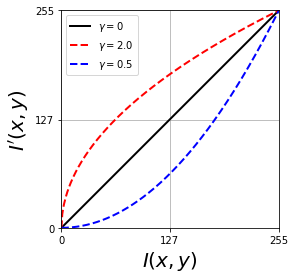

In [12]:
ganma_plt()

#### 参照：線形変換

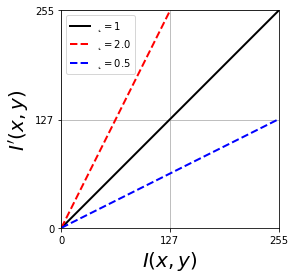

In [16]:
linear_plt()

## ガンマ変換の実装

$$I'(x,y) = I_{max}(\frac{I(x,y)}{I_{max}})^{\frac{1}{\gamma}}$$

### LUTを用いたガンマ補正計算式

In [18]:
def create_gamma_img(gamma, img):
  gamma_cvt = np.zeros((256,1), dtype=np.uint8)
  for i in range(256):
    gamma_cvt[i][0] = 255*(float(i)/255)**(1.0/gamma)
  return cv2.LUT(img, gamma_cvt)

### 繰り返し計算を用いたガンマ補正計算式


In [35]:
def create_gamma_img_2(gamma,img):
  imax = img.max()
  img_tmp = imax * (img / imax)**(1/gamma)
  img_tmp = img_tmp.astype(np.uint8)
  return img_tmp

### LUTってなに
- 入力 → 出力をあらかじめ決めた表
  - 各画素ごとに計算をするとピクセル数分の計算が必要
  - LUTを使うと256回の計算とピクセル数分の参照で変換ができる！ → 計算コスト削減

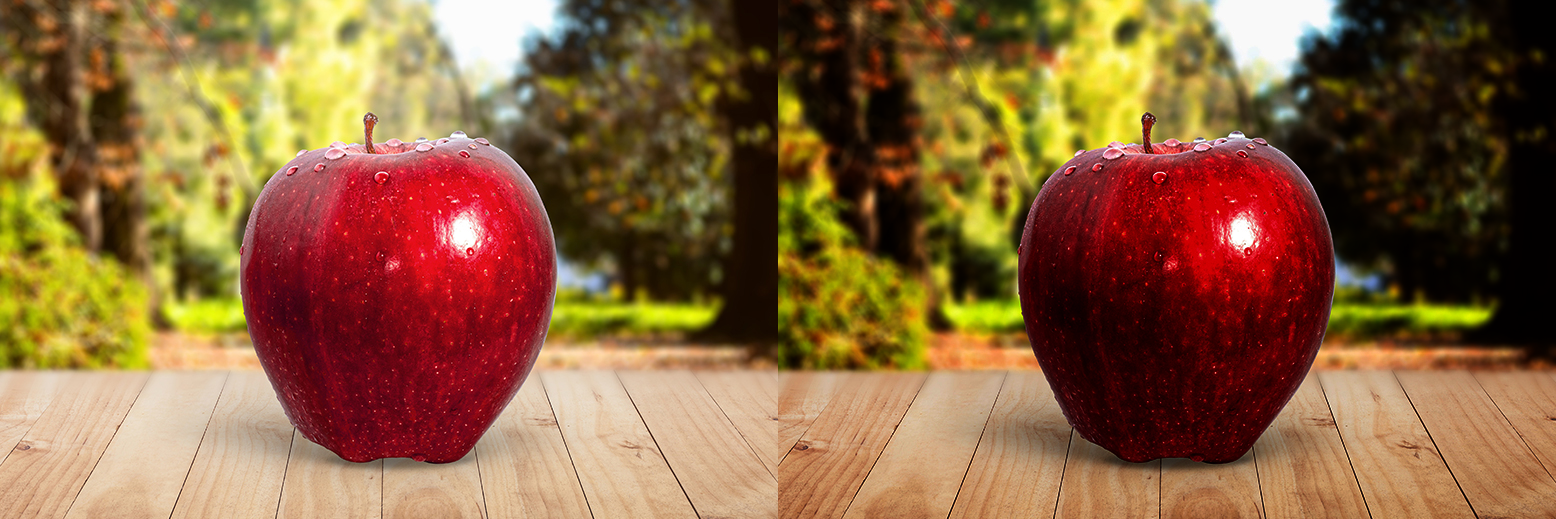

In [40]:
img = cv2.imread("./apple_01.jpg")

gamma = 0.5

img_gamma = create_gamma_img(gamma, img)
imgs = cv2.hconcat([img, img_gamma])
cv2_imshow(imgs)